# Data-Set Initial Pre-Processing

This notebook focusses on identifying the techniques that may enhance the images in the data-set

## Author: Alexander Goudemond, Student Number: 219030365

# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import cv2
from PIL.Image import fromarray

from os import mkdir, getcwd, walk
from os.path import join

from IPython.display import Video

# Summary of Previous Work

Several valuable pieces of information have emerged as a result of the 2nd (002) and 3rd (003) notebooks

From 002 and 003, we can reflect upon the following:

- There are 20 folders, making up the data-sets. Together, these images take up ~7.5 GB (Mostly TIFFs)

- There are 10 different kinds of data-set sources, which are listed below:

BF-C2DL-HSC

BF-C2DL-MuSC

DIC-C2DH-HeLa

Fluo-C2DL-Huh7

Fluo-C2DL-MSC

Fluo-N2DH-GOWT1

Fluo-N2DH-SIM+

Fluo-N2DL-HeLa

PhC-C2DH-U373

PhC-C2DL-PSC


- Each of those folders have a training set and a challenge set. The challenge set is denoted by a (1). The main distinction between the folders is that the training sets have manually segmented and manually tracked images for some of the images present. The challenge data-sets ONLY have the images

- Windows Photo Viewer and OpenCV are unable to view the features contained in these manually segmented and tracked images. They also cannot show the Simulated Data-Sets (Denoted by a plus symbol above)

- Matplotlib.pyplot is able to view all the information in the data-sets, and we can use the built in colourmaps to convert the file into a format that Windows Photo Viewer and OpenCV can then use

- Several colourmaps were considered, and cross examined across the 10 data-sets. The 3 recurring colourmaps that may be useful are: 'gray', 'Greys' and 'seismic'. The difference between 'gray' and 'Greys' appears to be the variation of whitelight, as 'Greys' appears whiter

- The author generated 4 videos to encapsulate the movement of the cells over time, which includes Colour, Grayscale, Greys and Seismic

- In 003, the author stitched a sample of the 4 videos together. 1 example is shown below:

In [2]:
Video("003_ColourExploration\\Fluo-N2DH-SIM+_01.mp4")

In [3]:
Video("003_ColourExploration\\Fluo-N2DL-HeLa_01.mp4")

- The stitched videos are generated using moviepy, and have 10 frames a second. Thus, some videos stop moving after 5 seconds, whereas other have 10 seconds to display

- Fluo-N2DL-HeLa_01.mp4 appears to be white for Colour and Grayscale, but this is probably due to using OpenCV to generate the initial videos. The processing steps of each image will first save the images as 'gray' via Matplotlib.pyplot, then be read in via OpenCV

The video comparison reveals valuable information:

- Colour and Grayscale videos are virtually identical

- "Greys" brightens the images, which may saturate cells with low intensity values

- "seismic" creates a kind of heat map, which clearly shows feature movement over time (nucleus, organelles, etc.)

- All 4 videos demonstrate a pulsating light effect, which is most noticeable in the 'seismic' data-set. But, all display it upon close inspection

- The seismic video is fantastic for identifying cells 'hiding' in the background, with low intensity values

All 10 data-sets need to be processed to ensure:

- Hidden data is present

- Noise is absent

- Cell Boundaries are clearly recognized

From the synopsis above, we can use this notebook to focus on techniques to process the images!

# Test Images generation

Here, we will generate the locations for 10 test images, which will be used to identify valuable processing steps

In [4]:
# create directory for work we create
def tryMakeDirectory(current_directory, destination_directory):
    try:
        # join comes from os.path
        mkdir( join(current_directory, destination_directory) )
    except FileExistsError:
        print("Folder already exists!")
        pass
    except:
        print("Unknown Error Encountered...")

In [5]:
'''
We only need to show every _OTHER_ folder, as each data-set has a 
 training and challenge set. So out of 20 files, we need to show 10

First things first, let us create an array of the directory locations
'''

data_sets = "..\\..\\Comp700_DataSets"
current_directory = getcwd()

path = walk(current_directory + "\\" + data_sets)

directory_array = [] # contains the main folders

i = 1
for root, dirs, files in path:
    if (i == 2):
        directory_array = dirs
        break
    
    i += 1

print("Directory Array")
print(directory_array)


Directory Array
['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']


In [6]:
# Now, generate the array of images
test_images = []

i = -1
temp = -1
for root, dirs, files in path:
    # print(dirs)
    for item in files:
        # only execute for first picture in directory
        if ("t0000.tif" == item) or ("t000.tif" == item):
            i += 1

            # skips folder "02" in data-sets
            if (i % 2 == 1):
                break
                
            # print(i)
            temp = i // 2

            # skip Challenge data-sets
            if ("(1)" in directory_array[temp]):
                break

            location = ( current_directory + "\\" + data_sets + "\\Extracted\\" + directory_array[temp] + 
                        "\\" + directory_array[temp] + "\\01\\" + item)
            # print(location)

            img = plt.imread(location)

            test_images.append(img) # place into array

            break

        else:
            break


In [7]:
# generate labels for test_images
label_array = []

for i in range(20):
    if (i % 2 == 0):
        label_array.append(directory_array[i])

print("\nLabel Array")
print(label_array)



Label Array
['BF-C2DL-HSC', 'BF-C2DL-MuSC', 'DIC-C2DH-HeLa', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-MSC', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-SIM+', 'Fluo-N2DL-HeLa', 'PhC-C2DH-U373', 'PhC-C2DL-PSC']


Now, save the images to InitialPreProcessing. Thankfully, Matplotlib.pylot can save them as Tiffs, so our concern in the first notebook is addressed!


In [8]:
# save the 10 images to our desired folder
desired_directory = "004_InitialPreProcessing"
tryMakeDirectory(current_directory, desired_directory)

i = 0
for pic in test_images:
    location = current_directory + "\\" + desired_directory + "\\" + label_array[i] + ".tiff"
    plt.imsave(location, pic, cmap="gray")
    i += 1

Folder already exists!


We can read these images in through OpenCV, for our processing needs.

# OpenCV - Read in Images

Here, we read in the images in our local directory and store them in test_images

Let us try stitch the 10 images together, to show all 10 videos to the user through OpenCV

In [9]:
path = walk(desired_directory)

test_images = [] # reset variable
test_images_names = []

for root, dirs, files in path:
    for pic_name in files:
        if (".tiff" in pic_name):
            # print(pic_name)
            test_images_names.append(pic_name)
# print(test_images_names)

# read in images in 1 go
for i in range(len(test_images_names)):
    if (i == 0):
        (x, y) = img.shape
        
    img = cv2.imread(desired_directory + "\\" + test_images_names[i], cv2.IMREAD_GRAYSCALE)
    img_reshaped = cv2.resize(img, (x // 2, y // 2))
    test_images.append(img_reshaped)

Now, let us stitch them together!

In [10]:
# from PIL.Image import fromarray

def stitchTogetherPics(array_of_images):
    # top level
    myList = (array_of_images[0], array_of_images[1], array_of_images[2], array_of_images[3], array_of_images[4])
    numpy_horizontal_top = np.hstack(myList)

    # bottom level
    myList = (array_of_images[5], array_of_images[6], array_of_images[7], array_of_images[8], array_of_images[9])
    numpy_horizontal_bottom = np.hstack(myList)

    # stick 2 ontop of one another
    myList = (numpy_horizontal_top, numpy_horizontal_bottom)
    numpy_final_pic_concat = np.concatenate(myList, axis=0)

    return numpy_final_pic_concat

def saveAndShow(desired_directory, image_array, picName):
    fileName = desired_directory + "\\" + picName

    # Save pic to file, using Pillow!
    new_img = fromarray(stitchTogetherPics(image_array))
    new_img.save(fileName) # save using Pillow

    # show the image to the user
    new_img = cv2.imread(fileName, cv2.IMREAD_GRAYSCALE)

    cv2.imshow(picName, new_img)
    cv2.waitKey(0)

In [11]:
saveAndShow(desired_directory, test_images, picName="01_StitchedImages.png")

# Process the images

Here, we explore the techniques we can use to process the images. At each junction, JPG versions of the images will be saved to file for reference

In [12]:
# Useful functions

def histEqualization(img):
    return cv2.equalizeHist(img)

def gaussianSmooth(img, arraySize):
    return cv2.GaussianBlur(img, (arraySize,arraySize), 0)

def medianSmooth(img, arraySize):
    return cv2.medianBlur(img,arraySize)

In [13]:
# let us loop through and generate an array of histogram corrected images
hist_eq_images = []

for i in range(len(test_images)):
    hist_eq_images.append( histEqualization( test_images[i] ) )

picName = "02_HistogramEqualized.png"
saveAndShow(desired_directory, hist_eq_images, picName)

Wow! That is terrible! There is a lot of noise present and a lot of the cell features are lost

Does smoothing improve this?


In [14]:
gauss_smoothed_hist_eq_images = []

for i in range(len(hist_eq_images)):
    smoothed_img = gaussianSmooth( hist_eq_images[i], arraySize=3 )
    gauss_smoothed_hist_eq_images.append( histEqualization( smoothed_img ) )

picName = "03_GaussianSmoothed_HistogramEqualized.png"
saveAndShow(desired_directory, gauss_smoothed_hist_eq_images, picName)

That didn't seem to help... what about median smoothing?

In [15]:
median_smoothed_hist_eq_images = []

for i in range(len(hist_eq_images)):
    smoothed_img = medianSmooth( hist_eq_images[i], arraySize=3 )
    median_smoothed_hist_eq_images.append( histEqualization( smoothed_img ) )

picName = "04_MedianSmoothed_HistogramEqualized.png"
saveAndShow(desired_directory, median_smoothed_hist_eq_images, picName)

Okay, the smoothing before histogram equalization is not working... Histogram Equalization is clearly a bad idea.

What about just smoothing the images?

In [16]:
gaussian_smoothed_images = []

for i in range(len(test_images)):
    smoothed_img = gaussianSmooth( test_images[i], arraySize=3 )
    gaussian_smoothed_images.append(smoothed_img)

picName = "05_GaussianSmoothed.png"
saveAndShow(desired_directory, gaussian_smoothed_images, picName)

In [17]:
median_smoothed_images = []

for i in range(len(test_images)):
    smoothed_img = medianSmooth( test_images[i], arraySize=3 )
    median_smoothed_images.append(smoothed_img)

picName = "06_MedianSmoothed.png"
saveAndShow(desired_directory, median_smoothed_images, picName)

From the above, The standard Smoothing appears to help with some subtle noise, but arraysize can't exceed 3... It also blurs the images a bit, so applying a filter may not be necessary... The images may not need to have the filter applied.

Let us consider Thresholding next

We need to consider iterative thresholding, as we seek to bring out the underlaying cells (in poorly lit areas)

Let us start with simple thresholding and then iterate:

First, we need to identify the minimum and maximum values of the images

In [18]:
for i in range(len(test_images)):
    print("Image", i+1, end=":\t")
    print("Maximum Value:", np.amax(test_images[i]), end=",\t")
    print("Minimum Value:", np.amin(test_images[i]))

Image 1:	Maximum Value: 219,	Minimum Value: 9
Image 2:	Maximum Value: 206,	Minimum Value: 18
Image 3:	Maximum Value: 240,	Minimum Value: 7
Image 4:	Maximum Value: 255,	Minimum Value: 0
Image 5:	Maximum Value: 211,	Minimum Value: 3
Image 6:	Maximum Value: 230,	Minimum Value: 0
Image 7:	Maximum Value: 248,	Minimum Value: 5
Image 8:	Maximum Value: 253,	Minimum Value: 0
Image 9:	Maximum Value: 243,	Minimum Value: 4
Image 10:	Maximum Value: 255,	Minimum Value: 68


We must use this knowledge to generate a function that considers the threshold of the relevant image:

In [19]:
def thresholdTheImage(img, threshold_value):
    max_value = np.amax(img)
    return cv2.threshold(img, threshold_value, max_value, cv2.THRESH_BINARY)

Let us try the function with a threshold of 255 // 2 == 127

In [20]:
# Try first image
_, thresh_img = thresholdTheImage(test_images[0], 127)

cv2.imshow("Thresholded Image", thresh_img)
cv2.waitKey(0)

-1

That works! Now, let us do a collection of the images:

In [21]:
thresholded_images = []

for i in range(len(test_images)):
    _, thresh_img = thresholdTheImage(test_images[i], 127)
    thresholded_images.append(thresh_img)

picName = "07_Thresholded_127.png"
saveAndShow(desired_directory, thresholded_images, picName)

The results are rather poor... Let us try thresholding at a lower level, and a higher level:

In [22]:
thresholded_images = []

for i in range(len(test_images)):
    _, thresh_img = thresholdTheImage(test_images[i], 63)
    thresholded_images.append(thresh_img)

picName = "07_Thresholded_63.png"
saveAndShow(desired_directory, thresholded_images, picName)

This image appears rather white for many of the images, understandibly

In [23]:
thresholded_images = []

for i in range(len(test_images)):
    _, thresh_img = thresholdTheImage(test_images[i], 190)
    thresholded_images.append(thresh_img)

picName = "07_Thresholded_190.png"
saveAndShow(desired_directory, thresholded_images, picName)

What we should try next is Otsu's Method for Thresholding, as well as Adaptive Thresholding:

In [24]:
def otsuThreshold(img):
    max_value = np.amax(img)
    return cv2.threshold(img, 0, max_value, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [25]:
# Try first image
_, otsuThresh_img = otsuThreshold(test_images[0])

cv2.imshow("Thresholded Image", otsuThresh_img)
cv2.waitKey(0)

-1

That may be promising, let us try all images:

In [26]:
otsuThresholded_images = []

for i in range(len(test_images)):
    _, otsuThresh_img = otsuThreshold(test_images[i])
    otsuThresholded_images.append(otsuThresh_img)

picName = "0801_OtsuThreshold.png"
saveAndShow(desired_directory, otsuThresholded_images, picName)

This is okay, though some images have undesirable features. Does a Gaussian Blur help?

In [27]:
blur_otsuThresholded_images = []

for i in range(len(test_images)):
    blur = cv2.GaussianBlur(test_images[i], (5, 5), 0)
    _, otsuThresh_img = otsuThreshold(blur)
    blur_otsuThresholded_images.append(otsuThresh_img)

picName = "0802_Blur_OtsuThreshold.png"
saveAndShow(desired_directory, blur_otsuThresholded_images, picName)

That is the most promising feature yet! Though some pictures have problems... The first image has the cell absorbed by black light, and the last image is saturated in white light... Does adaptive thresholding improve things?

In [28]:
def adaptiveThresholdingMean(img):
    max_value = np.amax(img)
    return cv2.adaptiveThreshold(img, max_value, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)

def adaptiveThresholdingGaussian(img):
    max_value = np.amax(img)
    return cv2.adaptiveThreshold(img, max_value, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize=11, C=2)

In [29]:
adaptiveThresholdedMean_images = []

for i in range(len(test_images)):
    thresh_img = adaptiveThresholdingMean(test_images[i])
    adaptiveThresholdedMean_images.append(thresh_img)

picName = "0803_AdaptiveThresholdMean.png"
saveAndShow(desired_directory, adaptiveThresholdedMean_images, picName)

That is quite nice, though a lot of noise is present

In [30]:
adaptiveThresholdedGaussian_images = []

for i in range(len(test_images)):
    thresh_img = adaptiveThresholdingGaussian(test_images[i])
    adaptiveThresholdedGaussian_images.append(thresh_img)

picName = "0804_AdaptiveThresholdGaussian.png"
saveAndShow(desired_directory, adaptiveThresholdedGaussian_images, picName)

Although that is nice, the Adaptive Thresholding Mean images are slightly clearer. Cell shape is preserved, even in the highly lit final image! Though, the presence of noise makes it difficult to find the cells in the first 2 images... What about if we blurred the Adaptive Thresholding Mean images? 

In [31]:
blurAdaptiveThresholdedMean_images = []

for i in range(len(test_images)):
    blur = cv2.GaussianBlur(test_images[i], (5, 5), 0)
    thresh_img = adaptiveThresholdingMean(blur)
    blurAdaptiveThresholdedMean_images.append(thresh_img)

picName = "0805_BlurAdaptiveThresholdMean.png"
saveAndShow(desired_directory, blurAdaptiveThresholdedMean_images, picName)

That is the best result so far! Let us recreate it with median smoothing, to compare:

In [32]:
smoothedAdaptiveThresholdedMean_images = []

for i in range(len(test_images)):
    smoothed_img = medianSmooth( test_images[i], arraySize=3 )
    thresh_img = adaptiveThresholdingMean(smoothed_img)
    smoothedAdaptiveThresholdedMean_images.append(thresh_img)

picName = "0806_SmoothedAdaptiveThresholdMean.png"
saveAndShow(desired_directory, smoothedAdaptiveThresholdedMean_images, picName)

Hands down, the blurred images contain less noise! I think we have a fantastic processing tool for segmentation!

Let us bring that into view with Matplotlib and focus closely on it:

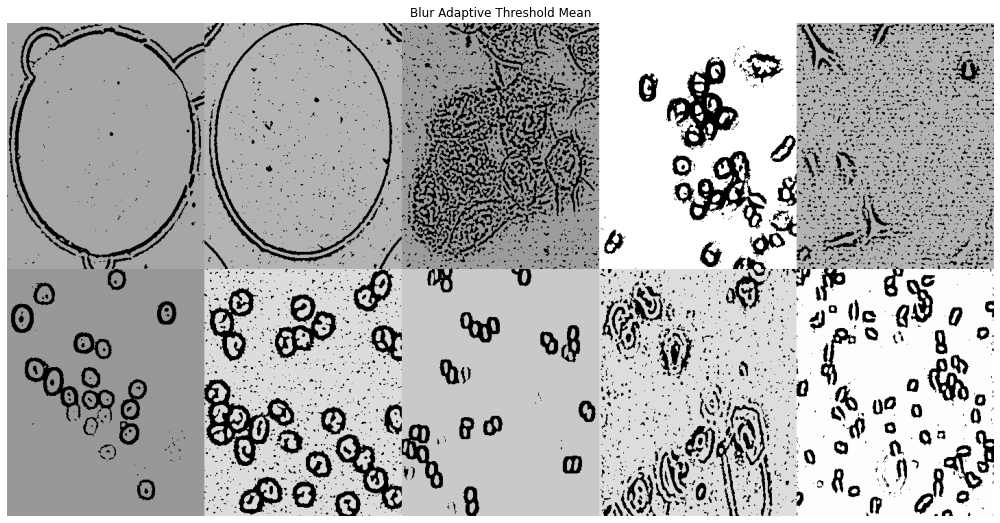

In [35]:
fig = plt.figure(figsize=(14, 10))

fig.add_subplot(1, 1, 1)
plt.title("Blur Adaptive Threshold Mean")

img = plt.imread( join(desired_directory, "0805_BlurAdaptiveThresholdMean.png") )
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.tight_layout()

plt.show()

Now! if we following the naming convention:


A B C D E F

G H I J K L

Then, we can see that the cells in blocks D - J and L are easy to identify. K may pose a challenge, but the hidden information is coming through. A and B though, the cell is not clearly being shown. Because of the clustering in C, the cells also appear to be speckled, when in reality, they need to de distinct.

An investigation of Morphological Operations on this kind of Thresholding may be ideal.